In [3]:
from math import pi
import numpy as np
import math

In [4]:
l_limit = 0          #Limits of the integration over theta space
u_limit = 2*pi
d = 40               #no of parameters in the circuit
gamma = 0.5          #hyperparameter in calculation of effective dimension

In [5]:
Vtheta = (u_limit - l_limit)**d      #Volume integral over the theta space

In [6]:
def sum_traces(fubini_matrices):     #Calculates the sum of traces of all the Fubini Matrices, to be used in integration       
    sTrace = 0
    for i in range(len(fubini_matrices)):
        sTrace += np.trace(fubini_matrices[i])
    return sTrace

In [7]:
def int_traces(fubini_matrices, N):   #Computed the integral of tr(F(theta)) over theta space
    return ((u_limit-l_limit)**d)*sum_traces(fubini_matrices)/N

In [8]:
def normalisedFisher(n, fubini_matrices, N):  #Computes the normalised Fisher Matrix for a single Fubini Matrix at index n in the list
    return d*Vtheta*(fubini_matrices[n])/(int_traces(fubini_matrices, N))

In [9]:
def func_effDim(matrix, N, gamma):  #Computes the function inside the integral (square root term in numerator) for effective dimension calculation
    factor = gamma*N/(2*pi*math.log10(N))
    determinant_value = np.identity(d) + factor*matrix
    return (np.linalg.det(determinant_value))**0.5

In [10]:
def int_effDim(normalisedMatrices, N): #Computes the integral present in numerator of effective dimension formula
    sum_dets = 0
    for i in range(len(normalisedMatrices)):
        sum_dets += func_effDim(normalisedMatrices[i], N, gamma)
    return ((u_limit-l_limit)**d)*sum_dets/N

In [11]:
def eff_dim(fubini_matrices, N, gamma):  #Computes the effective dimension according to the equation-2, page 4
    sTraceFubini = sum_traces(fubini_matrices)
    normalisedMatrices = []
    for i in range(len(fubini_matrices)):
        normalisedMatrices.append(normalisedFisher(i, fubini_matrices, N))
    factor = gamma*N/(2*pi*math.log10(N))
    return 2*math.log10(int_effDim(normalisedMatrices, N)/Vtheta)/math.log10(factor)

In [14]:
import pickle    #importing the fisher matrices stored in the pickle file
file_name = "EasyQuantum40500.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()

In [15]:
fubini_matrices = loaded_list[1]

In [16]:
eff_dims = [ ]           #Computes effective dimension for the 500 fisher matrices 
dataV = [ ]   
 
for i in np.linspace(0.2, 1.0, 20):  #gamma values
    eff_dimV = []
    data = []
    for j in range(100, 600, 100):   #no of datapoints
        data.append(j)
        eff_dimV.append(eff_dim(fubini_matrices[:j], j, i) / d)
    
    eff_dims.append(eff_dimV)
    dataV.append(data)

In [17]:
dataPoints = [i for i in range(100, 600 ,100)]

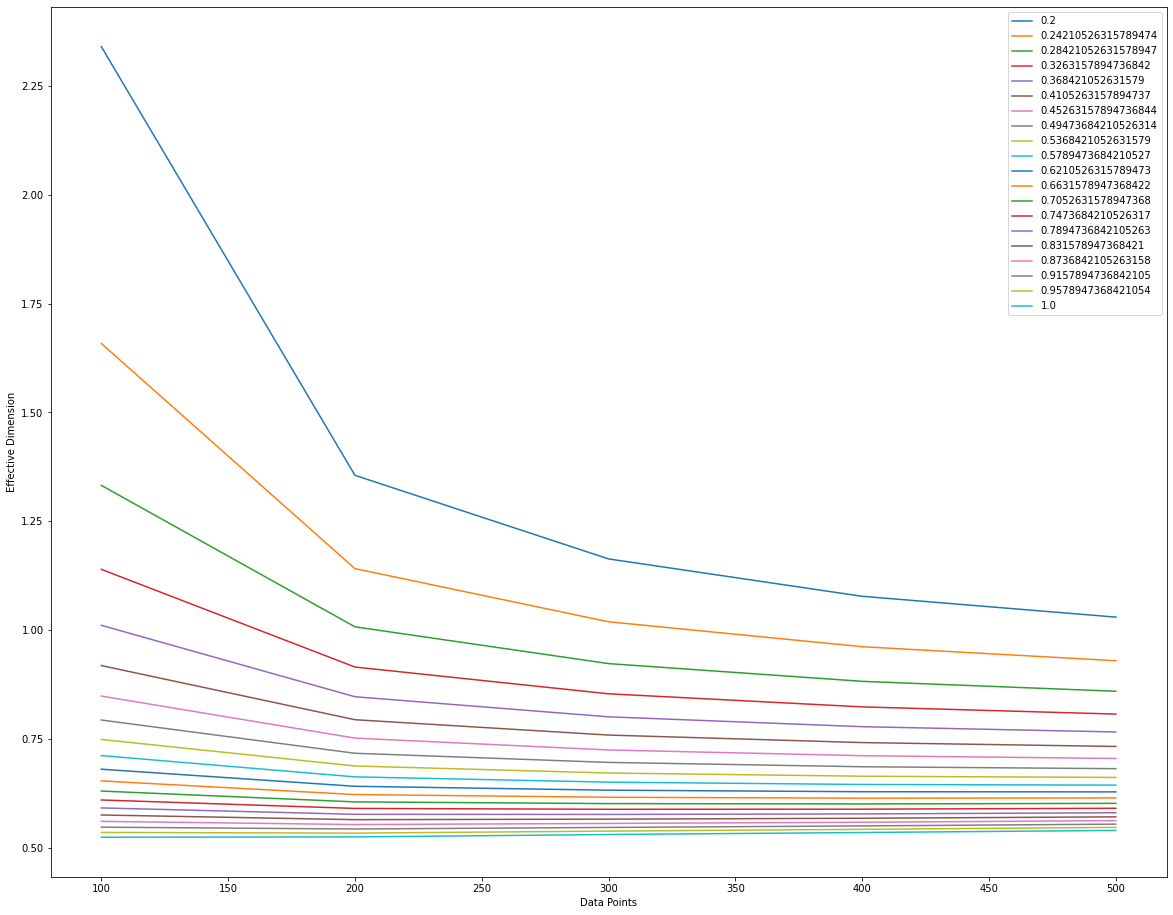

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20, 16])

for i in range(20):
    plt.plot(dataPoints, eff_dims[i])
        
legendList = ['{}'.format(i) for i in np.linspace(0.2, 1.0, num = 20)]
plt.xlabel('Data Points')
plt.ylabel('Effective Dimension')
plt.legend(legendList)
plt.savefig('EffDimsGraph')
plt.show()